# 04: Simple neural net with PyTorch

In [27]:
# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = "../data/"
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/guiwitz/DLImaging/master/utils/check_colab.py",
    "check_colab.py",
)
from check_colab import set_datapath

colab, datapath = set_datapath(local_folder)

In [28]:
from torch import nn

In [29]:
# Create a linear layer that takes vector size 5 as input, and outputs a vector size 1044

lin_layer = nn.Linear(in_features=5, out_features=10)

In [30]:
# List the parameters in this single layer
list(lin_layer.parameters())

[Parameter containing:
 tensor([[ 0.1783,  0.3561, -0.3590,  0.0736, -0.0596],
         [ 0.3588, -0.4438, -0.1683,  0.0720,  0.1957],
         [ 0.2292, -0.0698,  0.3378, -0.3111, -0.3138],
         [ 0.3356, -0.0387, -0.3998,  0.3594,  0.4097],
         [ 0.3697, -0.3972,  0.4299,  0.2861,  0.2349],
         [ 0.3822,  0.0865,  0.3666, -0.2559,  0.1548],
         [ 0.3819, -0.3540,  0.3386, -0.2987,  0.0684],
         [-0.4457,  0.1852,  0.0741,  0.0278, -0.4095],
         [-0.1144,  0.1446,  0.4327,  0.3990, -0.1856],
         [-0.0266,  0.3403,  0.2048,  0.1113,  0.3524]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0945, -0.0139,  0.2263, -0.0307,  0.4064,  0.2341,  0.2265,  0.2531,
         -0.1029,  0.1202], requires_grad=True)]

### Passing an input

Our layer takes a vector as an input so let's try to creat a vector of size 5 and pass it through the layer:

In [31]:
import numpy as np

In [32]:
myvector = np.random.randint(0, 100, 5)
myvector

array([60, 71,  5,  7, 91])

Pass it to lin_layer:

In [33]:
lin_layer(myvector)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

We get an error, as the layer doesn't expect a Numpy array but a PyTorch tensor
We can convert Numpy array into a tensor:

In [35]:
import torch

In [36]:
mytensor = torch.tensor(myvector)
mytensor

tensor([60, 71,  5,  7, 91])

In [37]:
lin_layer(mytensor)

RuntimeError: expected scalar type Long but found Float

Error: The weights in the layer are by default float32. So the input should match this. However we passed 64 bit integers, creating a conflict. 
Modify the tensor:

In [38]:
mytensor.dtype

torch.int64

In [39]:
mytensor_float = mytensor.float()
mytensor_float

tensor([60., 71.,  5.,  7., 91.])

In [40]:
mytensor_float.dtype

torch.float32

**To do it earlier on while converting numpy to tensor:**

In [41]:
mytensor_float = torch.tensor(myvector, dtype=torch.float32)

In [42]:
output = lin_layer(mytensor_float)
output

tensor([ 29.3733,   7.4734, -20.0223,  55.1558,  19.9163,  43.4370,   3.8295,
        -50.0400,  -8.6345,  56.5557], grad_fn=<AddBackward0>)

In [43]:
output.size()

torch.Size([10])

Output has expected size of 10!

Can add other layers:

In [44]:
lin_layer2 = nn.Linear(10, 3)
output = lin_layer2(output)

In [45]:
output.size()

torch.Size([3])

## Activation

In addition to layers, we will also need activation functions such as soft max.

These are implemented as modules in **torch.nn** as well as functions in **torch.functional** which we will use here:

In [46]:
import torch.nn.functional as F

As we use the functional form, we can pass the output of the above linear layer directly to the activation function, here as a ReLU:

In [47]:
lin_layer_activated = F.relu(output)

In [48]:
lin_layer_activated

tensor([ 0.0000, 20.9437,  0.0000], grad_fn=<ReluBackward0>)

## Structure of a network

Now that we have seen how to create a layers and activation functions we can assemble them into a usable network structure. In PyTorch that structure is nn.Module a base class on top of which we can build our network. We can specify what parameters we want to pass when creating this object and we also have to define a single function, forward, which describes the network itself. Here's an example:

In [49]:
class Mynetwork(nn.Module):
    def __init__(self, myparameter1, myparameter2):
        super(Mynetwork, self).__init__()

        # define layers here
        self.layer1 = nn.Linear(myparameter1, 5)
        self.layer2 = nn.Linear(5, myparameter2)

    def forward(self, x):

        # define the sequence of operations in the network including eg. activations
        x = F.relu(self.layer1(x))
        x = self.layer2(x)    

        return x


Here, we defined: 
- a simple network defined by two parameters: **myparameter1**, **myparameter2** which is comprised of 2 linear layers and a ReLU unit.
- The different layers that we need are defined in __init__ as object parameters and then re-used in the network definition in the **forward** function
- **forward** takes an input **x** (eg. an image to classify), passes it through the network and outputs the result
- So, in principal we could instantiate a model and use it like this: 

        $ mymodel = Mynetwork(9,3)
        $ mymodel.forward(myinput)

However, **nn.Module** has a __call__ attribute that allows us to use the class as a function like this:

        $ mymodel = Mynetwork(9,3)
        $ mymodel(myinput)

*This is how a model should be used properly, to expoit all the capabilities offered in PyTorch*

Trying it out, we instantiate the model:

In [50]:
mymodel = Mynetwork(9, 3)

Just like for the single linear layer before, we can have a look at all parameters:

In [51]:
list(mymodel.parameters())

[Parameter containing:
 tensor([[ 0.3304, -0.0406, -0.2161, -0.2615, -0.0898, -0.1179,  0.1703, -0.0806,
          -0.1688],
         [-0.2263,  0.2773, -0.0357,  0.1517,  0.0399, -0.0994,  0.0964, -0.1243,
          -0.1230],
         [ 0.1338, -0.1805, -0.0814, -0.0399,  0.1184, -0.1443,  0.0473,  0.1608,
          -0.0425],
         [-0.2538,  0.1564,  0.2658,  0.1563, -0.0960,  0.1982,  0.0178,  0.0548,
           0.1503],
         [-0.3100, -0.2089, -0.3043, -0.1585,  0.0447, -0.1350,  0.2028,  0.0225,
          -0.1704]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1032, -0.1842, -0.0524, -0.0418,  0.1983], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1828, -0.0054, -0.3419,  0.0007, -0.2423],
         [-0.2979,  0.1850,  0.1159, -0.0752, -0.4303],
         [-0.0548,  0.2920,  0.3381,  0.3030,  0.1242]], requires_grad=True),
 Parameter containing:
 tensor([-0.3549,  0.3781,  0.4242], requires_grad=True)]

In [52]:
list(mymodel.modules())

[Mynetwork(
   (layer1): Linear(in_features=9, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=3, bias=True)
 ),
 Linear(in_features=9, out_features=5, bias=True),
 Linear(in_features=5, out_features=3, bias=True)]

We see some repeats because we see here modules at all levels. E.g. each linear layer is a module but our entire network is a module as well.

We can also just find all modules contained in our main module and recover its name and function:

In [53]:
for name, module in mymodel.named_children():
    print(f'name: {name} module: {module}')

name: layer1 module: Linear(in_features=9, out_features=5, bias=True)
name: layer2 module: Linear(in_features=5, out_features=3, bias=True)


Get a dictionary of all layers with their weights:

In [54]:
mymodel.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.3304, -0.0406, -0.2161, -0.2615, -0.0898, -0.1179,  0.1703, -0.0806,
                       -0.1688],
                      [-0.2263,  0.2773, -0.0357,  0.1517,  0.0399, -0.0994,  0.0964, -0.1243,
                       -0.1230],
                      [ 0.1338, -0.1805, -0.0814, -0.0399,  0.1184, -0.1443,  0.0473,  0.1608,
                       -0.0425],
                      [-0.2538,  0.1564,  0.2658,  0.1563, -0.0960,  0.1982,  0.0178,  0.0548,
                        0.1503],
                      [-0.3100, -0.2089, -0.3043, -0.1585,  0.0447, -0.1350,  0.2028,  0.0225,
                       -0.1704]])),
             ('layer1.bias',
              tensor([ 0.1032, -0.1842, -0.0524, -0.0418,  0.1983])),
             ('layer2.weight',
              tensor([[ 0.1828, -0.0054, -0.3419,  0.0007, -0.2423],
                      [-0.2979,  0.1850,  0.1159, -0.0752, -0.4303],
                      [-0.0548,  0.2920,  0.3381,  0.3030,

Finally, pass an input through our network. It takes an input of size 9:

In [55]:
my_input = torch.randn((9,))

In [56]:
my_input

tensor([ 0.6558, -2.4695,  1.3705, -0.8308, -0.5471, -0.0690, -0.2528, -0.9332,
        -0.9735])

In [57]:
output = mymodel(my_input)

In [58]:
output

tensor([-0.3975,  0.0962,  0.5062], grad_fn=<AddBackward0>)

## Batches

To use batch processing:
- we can pass batches of vectors through the network instead of single vectors
- PyTorch layers are designed to handle this by default
- eg. if we want to use a batch size = 32, we can use a 32 c 8 tensor 
- we can create one directly with **torch.randn** 

In [59]:
batch_tensor = torch.randn(32, 9)
batch_tensor.shape

torch.Size([32, 9])

In [60]:
batch_output = mymodel(batch_tensor)

In [61]:
batch_output.shape

torch.Size([32, 3])

### Passing an image as input

In [62]:
from skimage.draw import random_shapes
import matplotlib.pyplot as plt



Create a 32x32 image of a circle.

And invert image, set object as foreground:

In [63]:
image_circle, _ = random_shapes((32,32),max_shapes=1, min_shapes=1, shape='circle',
                                num_channels=1, channel_axis=None, min_size=8, random_seed=2)
image_circle = 255-image_circle

image_tensor = torch.tensor(image_circle, dtype=torch.float32)

In [64]:
image_tensor.shape

torch.Size([32, 32])

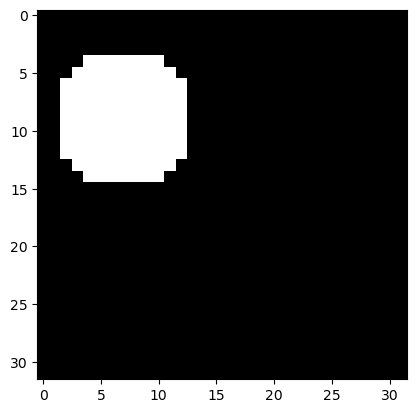

In [65]:
plt.imshow(image_tensor, cmap='gray');

Flatten image:

In [66]:
image_flat = image_tensor.view(-1)
image_flat.shape

torch.Size([1024])

Adjust network input size:

In [67]:
mymodel = Mynetwork(1024, 20)

In [68]:
output = mymodel(image_flat)

In [69]:
output

tensor([ 1.2844, -0.7863, -0.0225, -0.4302,  0.4401, -1.0229,  1.0368, -0.0764,
         0.4135, -1.4184, -0.4369, -1.5415, -0.9870, -1.2282,  0.7582, -0.4290,
        -0.5496,  0.1577,  1.2395,  0.9378], grad_fn=<AddBackward0>)

Note: flattening can be performed at different points. instead of flattening input, could have also flattened within our network definition:

In [70]:
class Mynetwork2(nn.Module):
    def __init__(self, myparameter1, myparameter2):
        super(Mynetwork2, self).__init__()

        # define layers here
        self.layer1 = nn.Linear(myparameter1, myparameter2)


    def forward(self, x):

        # Flatten
        x = x.view(-1) 
        # define the sequence of operations in the network including eg. activations
        x = F.relu(self.layer1(x))
        
        return x

In [71]:
second_model = Mynetwork2(1024, 20)

In [72]:
output = second_model(image_tensor)
output

tensor([ 5.9076,  0.0000,  0.0000,  0.0000,  8.9013,  0.0000,  0.3880,  4.8053,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 11.8445,  1.4290,  0.6757,
         7.4704,  3.6068,  3.8881,  3.8326], grad_fn=<ReluBackward0>)

In [73]:
output.shape

torch.Size([20])

### Saving and loading a model

Next notebook we will train our network. During this we will want to save our model and weights.


Two ways to do this:

### Save full model

- Save the entire model so it can be reloaded
- Can be problematic if moving saved models between computers.
- Created a models folder in dir

In [74]:
torch.save(second_model, datapath.joinpath('../models/simpleNN.pt'))

To reload:

In [75]:
third_model = torch.load(datapath.joinpath('../models/simpleNN.pt'))

In [76]:
third_model(image_tensor)

tensor([ 5.9076,  0.0000,  0.0000,  0.0000,  8.9013,  0.0000,  0.3880,  4.8053,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 11.8445,  1.4290,  0.6757,
         7.4704,  3.6068,  3.8881,  3.8326], grad_fn=<ReluBackward0>)

### Saving model state

Alternatively we can simply save all the parameters, which is a safer method. We simply recover them using state_dict:

In [78]:
torch.save(third_model.state_dict(),datapath.joinpath('../models/simpleNN_state.pt'))

To reload the parameters, we first instantiate the model & and 'fill' with those values using **load_state_dict**:

In [82]:
fourth_model = Mynetwork2(1024, 20)

In [84]:
params = torch.load(datapath.joinpath('../models/simpleNN_state.pt'))
params

OrderedDict([('layer1.weight',
              tensor([[-1.0993e-02,  1.9869e-02,  2.3766e-02,  ..., -2.7438e-02,
                        2.0099e-02,  1.7125e-02],
                      [-8.0458e-03, -2.5301e-02, -3.0787e-02,  ...,  2.6594e-02,
                        2.1697e-02,  1.2337e-02],
                      [ 2.7537e-05,  2.1004e-02, -2.4900e-02,  ...,  1.4359e-02,
                        2.8169e-02,  1.0439e-03],
                      ...,
                      [ 1.3788e-02, -1.8615e-02, -2.4981e-02,  ...,  1.3405e-02,
                       -2.3429e-02, -2.1308e-02],
                      [-2.8702e-02, -2.0998e-02,  6.0449e-03,  ..., -2.6826e-02,
                        1.1193e-02,  1.8285e-02],
                      [-2.4406e-02,  7.9038e-03,  1.2152e-02,  ...,  5.2912e-03,
                        2.4046e-02, -1.4188e-02]])),
             ('layer1.bias',
              tensor([-0.0218, -0.0026,  0.0074,  0.0002, -0.0273,  0.0270, -0.0117,  0.0107,
                      -0.0050,

In [85]:
fourth_model.load_state_dict(params)

<All keys matched successfully>

In [87]:
fourth_model(image_tensor)

tensor([ 5.9076,  0.0000,  0.0000,  0.0000,  8.9013,  0.0000,  0.3880,  4.8053,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 11.8445,  1.4290,  0.6757,
         7.4704,  3.6068,  3.8881,  3.8326], grad_fn=<ReluBackward0>)

##  Running on a GPU (run on Colab)

In [88]:
torch.cuda.is_available()

True

## 
Running on a GPU (run on Colab)

In [ ]:
if torch.cuda.is_available():
    dev = torch.device("cuda")
else:
    dev = torch.device("cpu")